<a href="https://colab.research.google.com/github/gabriellaaileen/DTS-Project/blob/main/RNN/RNN_Stock_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# Importing the libraries
import matplotlib.pyplot as plt
import datetime

In [3]:
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#ubah pathnya sesuai lokasi dataset 
dataset=pd.read_csv('/content/drive/MyDrive/time series/Google_Stock_Price_Train.csv',index_col="Date",parse_dates=True)

##Explore Dataset

In [6]:
dataset.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [7]:
#Menghitung presentase missing values dari masing-masing variabel
(dataset.isnull().sum()/len(dataset)*100).to_frame('Persentase Missing Value Dataset (%)')

,Persentase Missing Value Dataset (%)
Open,0.0
High,0.0
Low,0.0
Close,0.0
Volume,0.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


In [ ]:
print('Ukuran dataset:', dataset.shape)

Ukuran dataset: (1258, 5)


In [8]:
# convert column "a" of a DataFrame
dataset["Close"] = dataset["Close"].str.replace(',', '').astype(float)

In [9]:
dataset["Volume"] = dataset["Volume"].str.replace(',', '').astype(float)

In [10]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,1258.0,5.337098e+02,1.519044e+02,279.12,404.115,537.470,6.549225e+02,816.68
High,1258.0,5.378802e+02,1.530088e+02,281.21,406.765,540.750,6.625875e+02,816.68
Low,1258.0,5.290074e+02,1.505528e+02,277.22,401.765,532.990,6.448000e+02,805.14
Close,1258.0,7.126697e+02,1.647526e+02,491.20,576.740,695.675,7.821050e+02,1216.83
Volume,1258.0,3.158107e+06,2.273726e+06,7900.00,1621700.000,2566150.000,4.122500e+06,24977900.00


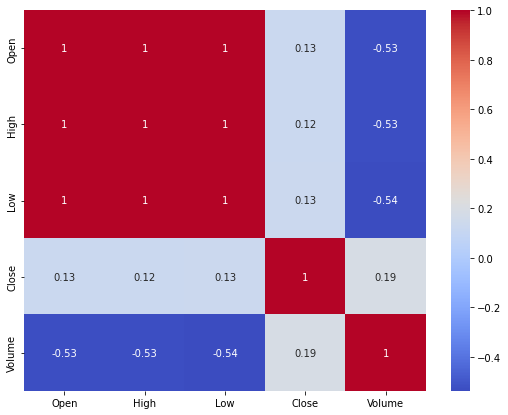

In [11]:
#Correlation check masing-masing kolom
plt.figure(figsize=(9,7))
sns.heatmap(dataset.corr(),annot=True,cmap="coolwarm")
plt.show()

#Visualize

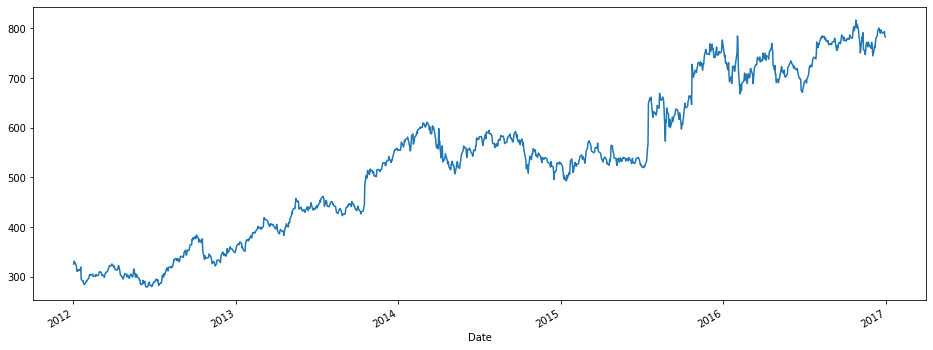

In [ ]:
dataset['Open'].plot(figsize=(16,6))

**What is a rolling average?**

 https://www.portent.com/blog/analytics/rolling-averages-math-moron.htm#:~:text=What%E2%80%99s%20a%20Rolling%20Average%3F%20A%20simple%20rolling%20average,to%20you%2C%20but%20to%20me%20it%E2%80%99s%20total%20mathinese.

In [ ]:
# 7 day rolling mean
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN
2012-01-11,323.002857,325.392857,318.682857,643.132857,7.208100e+06
2012-01-12,321.457143,322.882857,316.841429,638.037143,6.691514e+06
2012-01-13,318.698571,319.801429,314.025714,631.870000,6.531857e+06


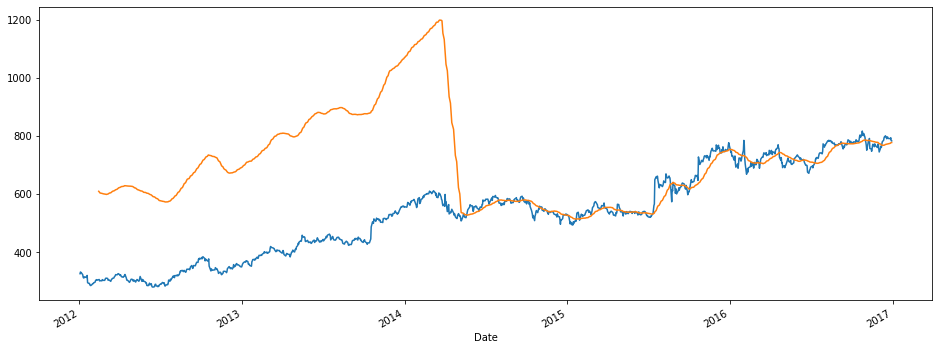

In [ ]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

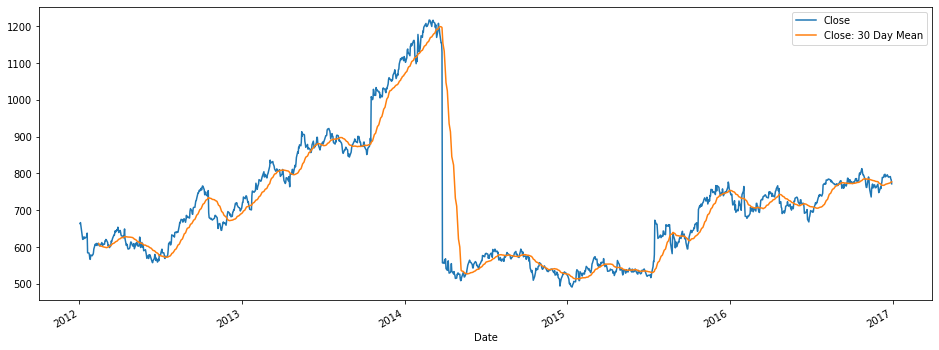

In [ ]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

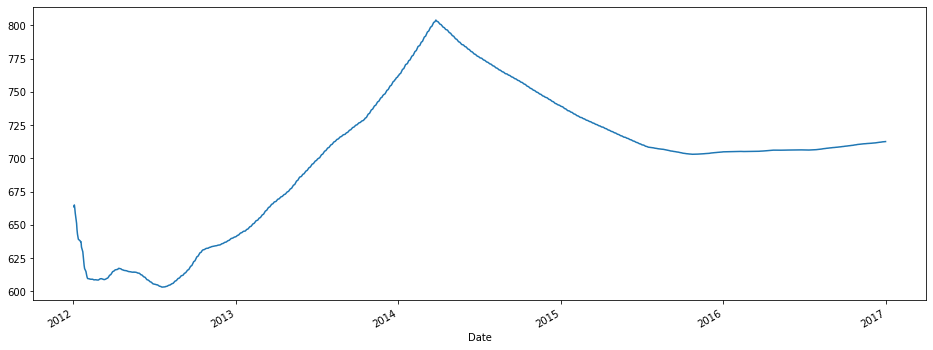

In [ ]:
# Optional specify a minimum number of periods
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [12]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)

In [13]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [14]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train[0].shape

(60, 1)

In [ ]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [15]:
#Building the RNN
#Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import tensorflow as tf

In [16]:
# Initialising the RNN
model_tune = Sequential()

In [ ]:
# Adding the first LSTM layer and some Dropout regularisation
# Adding a second LSTM layer and some Dropout regularisation
# Adding a third LSTM layer and some Dropout regularisation
# Adding a fourth LSTM layer and some Dropout regularisation
# Adding the output layer
# Code here


In [17]:
model_tune = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[60]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1)
])

In [18]:
model_tune.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 60, 1)             0         
                                                                 
 bidirectional (Bidirectiona  (None, 60, 256)          133120    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 60, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 60, 128)          164352    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 60, 128)           0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 60, 64)          

In [20]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model_tune.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)

In [ ]:
# Fitting the RNN to the Training set
history = model_tune.fit(X_train, y_train, batch_size=32, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
38/38 [==============================] - 13s 30ms/step - loss: 0.1620 - lr: 1.0000e-08
Epoch 2/100
38/38 [==============================] - 1s 29ms/step - loss: 0.1622 - lr: 1.1220e-08
Epoch 3/100
38/38 [==============================] - 1s 29ms/step - loss: 0.1622 - lr: 1.2589e-08
Epoch 4/100
38/38 [==============================] - 1s 28ms/step - loss: 0.1621 - lr: 1.4125e-08
Epoch 5/100
38/38 [==============================] - 1s 30ms/step - loss: 0.1624 - lr: 1.5849e-08
Epoch 6/100
38/38 [==============================] - 1s 29ms/step - loss: 0.1620 - lr: 1.7783e-08
Epoch 7/100
38/38 [==============================] - 1s 29ms/step - loss: 0.1621 - lr: 1.9953e-08
Epoch 8/100
38/38 [==============================] - 1s 29ms/step - loss: 0.1623 - lr: 2.2387e-08
Epoch 9/100
38/38 [==============================] - 1s 29ms/step - loss: 0.1618 - lr: 2.5119e-08
Epoch 10/100
38/38 [==============================] - 1s 29ms/step - loss: 0.1623 - lr: 2.8184e-08
Epoch 11/100
38/38

(1e-08, 0.001, 0.0, 0.2)

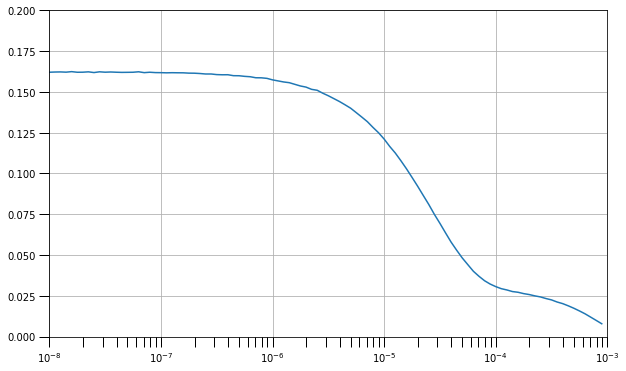

In [ ]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 0.2])

In [52]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

#Build model
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[60]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1)
])

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)

In [56]:
history = model.fit(X_train, y_train, batch_size=32, epochs=150)

Epoch 1/150
38/38 [==============================] - 1s 29ms/step - loss: 2.9049e-04
Epoch 2/150
38/38 [==============================] - 1s 28ms/step - loss: 2.3135e-04
Epoch 3/150
38/38 [==============================] - 1s 28ms/step - loss: 2.3186e-04
Epoch 4/150
38/38 [==============================] - 1s 28ms/step - loss: 2.5383e-04
Epoch 5/150
38/38 [==============================] - 1s 28ms/step - loss: 2.7499e-04
Epoch 6/150
38/38 [==============================] - 1s 28ms/step - loss: 2.5497e-04
Epoch 7/150
38/38 [==============================] - 1s 28ms/step - loss: 2.5225e-04
Epoch 8/150
38/38 [==============================] - 1s 28ms/step - loss: 2.1666e-04
Epoch 9/150
38/38 [==============================] - 1s 28ms/step - loss: 2.6208e-04
Epoch 10/150
38/38 [==============================] - 1s 28ms/step - loss: 2.4743e-04
Epoch 11/150
38/38 [==============================] - 1s 28ms/step - loss: 2.7830e-04
Epoch 12/150
38/38 [==============================] - 1s 27ms/s

In [23]:
# Making the predictions and visualising the results
# Getting the real stock price of 2017
dataset_test = pd.read_csv('/content/drive/MyDrive/time series/Google_Stock_Price_Test.csv',index_col="Date",parse_dates=True)

In [24]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [25]:
dataset_test["Volume"] = dataset_test["Volume"].str.replace(',', '').astype(float)

In [26]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [27]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes


In [57]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [58]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


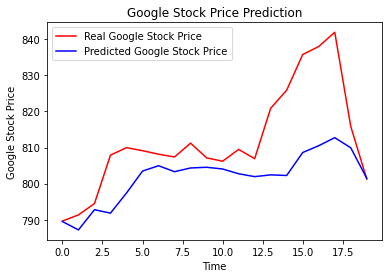

In [59]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()